# Public space control 

## HOG Approximation

In our first approximation to solving the problem we will use an SVM detector to analyze frames and detect the amount of people.

In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
PersonDetector = cv2.HOGDescriptor()
PersonDetector.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

Text(0.5,1,'Image Two')

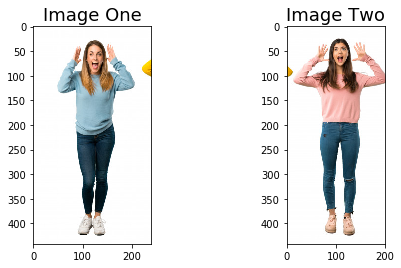

In [27]:
frame = cv2.imread('group_of_girls.jpg')
frames = [frame[0:480,0:240],frame[0:480,400:600]]
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
ax1.set_title('Image One', fontsize=18)
ax2.imshow(cv2.cvtColor(frames[1], cv2.COLOR_BGR2RGB))
ax2.set_title('Image Two', fontsize=18)

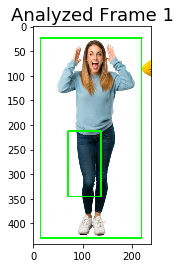

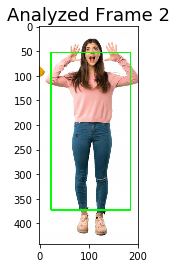

In [33]:
for i in range(len(frames)):
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    boxes, weights = PersonDetector.detectMultiScale(frames[i], winStride=(8,8) )
    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])
    img = frames[i].copy()
    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(img, (xA, yA), (xB, yB),(0, 255, 0), 2)

    f, (ax1) = plt.subplots(1, 1, figsize=(8,4))
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Analyzed Frame ' + str(i+1), fontsize=18)

The HOG detector has advantages and disadvantages. It doesn´t really require much computational resources, so even on a Raspberry Pi we could analyze every frame on real time video. But the disadvantage is that it isn´t really precise, as we can see in 'Analyzed Frame 1' it detects two parts in a single person which would affect our data acquisition and the results produced.

In our project we will need more precision and less analyzed frames, so with the resources a Raspberry Pi has to offer we can execute a more precise model, such as a convolutional neural network which will be our next approach to the problem.
